# JHUPIEGO - RISE DATA DISCOVERY
**Description**: This script generates an Exploratory Data Analysis of the Laboratory File.

**Author**: Marang Mutloatse

**Version**: 0.0.1

**Status**: Development

# Import Libraries

In [123]:
import pandas as pd
import datetime as dt
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import os
import yaml
plt.style.use('fivethirtyeight')
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 
%matplotlib inline

## Working Functions

In [124]:
def check_null_values(df):
    if df is not None:
        try:
            missing_value = df.isnull().sum()
            mis_val_percent = 100 * df.isnull().sum() / len(df)
            mis_val_table = pd.concat([missing_value, mis_val_percent], axis=1)
            mis_val_table_rename_cols = mis_val_table.rename(
                columns={0: "Missing Values", 1: "% of Total Values"}
            )
            mis_val_table_rename_cols = (
                mis_val_table_rename_cols[mis_val_table_rename_cols.iloc[:, 1] != 0]
                .sort_values("% of Total Values", ascending=False)
                .round(1)
            )
            print(
                "There are "
                + str(mis_val_table_rename_cols.shape[0])
                + " columns that have missing values"
            )
            return mis_val_table_rename_cols
        except Exception as e:
            print(f"Exception on checking missing values with error: {e}")
            
def load_excel_sheet(path: str):
    if path is not None:
        try:
            xls = pd.ExcelFile(path)
            df = xls.parse(skiprows=0)
            return df
        except Exception as e:
            print(f"Exception on loading excel spreadsheet with error: {e}")
            
def date_visit_conversion(df,visit_col: str,visit_year: str, visit_month: str):
    if df is not None:
        try:
            df = df.copy()
            df[visit_col] = pd.to_datetime(df[visit_col],errors='coerce')
            df[visit_year] = df[visit_col].dt.year
            df[visit_month] = df[visit_col].dt.month
            return df
        except Exception as e:
            print(f"Exception on converting visit date with error: {e}") 
            
def plot_visit_date(df, primary_key: str, data_name: str):
    if df is not None:
        df_sub = df.query("VISIT_YEAR > 1990 and VISIT_YEAR < 2022")
        df_sub_slice = df_sub.groupby("VISIT_YEAR").agg(
            {primary_key: lambda x: x.nunique()}
        )
        df_sub_slice.reset_index(inplace=True)
        df_sub_slice["VISIT_YEAR"] = df_sub_slice["VISIT_YEAR"].astype("int")
        ax_sub = sns.barplot(x="VISIT_YEAR", y=primary_key, data=df_sub_slice)
        ax_sub.set(xlabel="Year of Visit", ylabel="Number of Patient Visits")
        ax_sub.set_title(f"'Trend of Yearly Patient Visits:{data_name}'")
        plt.xticks(rotation=60)
        
def convert_to_datetime(df,date_col: str):
    if df is not None:
        try:
            df[date_col] = pd.to_datetime(df[date_col],errors='coerce')
            return df
        except Exception as e:
            print(f"Exception on converting to datetime with error: {e}")      

def print_min_max_dates(df,date_col: str,type_date: str):
    if df is not None:
        return print(f" The earliest {type_date} date is: {df[date_col].min()}, and the most recent {type_date} date is {df[date_col].max()}") 
    
def print_num_rows_cols(df, df_name: str):
        if df is not None:
            return print(f"{df_name} data has {df.shape[1]} columns and {df.shape[0]} rows.") 
        
def pie_plot(df, col, identifier, title=None, legend=(1,0)):
    grouped = df[[col, identifier]].groupby(col).count().reset_index()
    labels = list(grouped[col])
    grouped.plot.pie(x=col,y=identifier, labels=labels, autopct='%1.0f%%')
    plt.legend('')
    plt.title(title)
    plt.show()
    
def compare_bar_plot(df, date_col: str,compare_col_list,unique_id: str):
    df_viral_slice = df.groupby(['REPORTED_YEAR','State']).agg({unique_id:lambda x: x.nunique()})
    df_viral_slice.reset_index(inplace=True)
    df_viral_slice['REPORTED_YEAR'] = df_viral_slice['REPORTED_YEAR'].astype('int')
    ax_viral = sns.barplot(x = compare_list[0],y='LABORATORY_ID',data=df_viral_slice,hue='State')
    ax_viral.set(xlabel='Year Reported', ylabel='Number of Lab Results')
    ax_viral.set_title('Comparison Plot: Trend of Yearly Reported Lab Results')
    plt.xticks(rotation=60)
    plt.legend(loc='upper left')
    sns.set(rc={'figure.figsize':(10,10)})
    
def otherise(df): 
    if df['Labtest Name']=='Viral Load':
        return 'Viral Load'
    elif df['Labtest Name']=='CD4':
        return 'CD4'
    elif df['Labtest Name']=='Lymphocytes':
        return 'Lymphocytes'
    elif df['Labtest Name']=='PCV':
        return 'PCV'
    elif df['Labtest Name']=='WB4':
        return 'WB4'
    else:
        return 'Other Tests'
    
def categorical_bar_plot(df):
    if df is not None:
        for i in df.columns[df.dtypes==object]:
            df[i].value_counts().plot(kind='bar')
            plt.title(i)
            plt.show()
    
def yearly_bar_plot(df, date_col,unique_id):
    df_slice = df.groupby(date_col).agg({unique_id:lambda x: x.nunique()})
    df_slice.reset_index(inplace=True)
    df_slice[date_col] = df_slice[date_col].astype('int')
    ax = sns.barplot(x = date_col,y=unique_id,data=df_slice)
    ax.set(xlabel=date_col , ylabel='Number of Lab Results')
    ax.set_title('Trend of Yearly Lab Results')
    plt.xticks(rotation=60)
    sns.set(rc={'figure.figsize':(8,8)})
    
def comparison_line_plot(df):
    df_viral_slice = df_viral_subset.groupby(['COLLECTED_YEAR','COLLECTED_MONTH']).agg({'LABORATORY_ID':lambda x: x.nunique()})
    df_viral_slice.reset_index(inplace=True)
    df_viral_slice['COLLECTED_YEAR'] = df_viral_slice['COLLECTED_YEAR'].astype('int')
    df_viral_slice['COLLECTED_MONTH'] = df_viral_slice['COLLECTED_MONTH'].astype('int')
    ax_viral = sns.lineplot(x = 'COLLECTED_MONTH',y='LABORATORY_ID',data=df_viral_slice,hue='COLLECTED_YEAR',markers=True,style="COLLECTED_YEAR",)
    ax_viral.set(xlabel='Month Collected', ylabel='Number of Lab Results')
    ax_viral.set_title('Comparison Plot: Trend of Yearly Collected Lab Results')
    plt.xticks(rotation=60)
    plt.legend(loc='upper left')
    sns.set(rc={'figure.figsize':(10,10)})
    
def slice_df_by_date(df, date_col, alt_date_col, start_date, end_date):
    if df is not None:
        try:
            df = df.loc[
                (df[date_col] > float(start_date))
                & (df[date_col] < float(end_date))
                & (df[alt_date_col] > float(start_date))
                & (df[alt_date_col] < float(end_date))
            ]
            return df
        except Exception as e:
            print(f"Exception on slice to dataframe with error: {e}")

## Loading Data

In [125]:
# get parent working directory
user_dev_path = os.path.dirname(os.getcwd())

try: 
    with open (user_dev_path + '/' + 'config_LTFU.yaml', 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print(f'Error reading the config file, {e}')

In [126]:
input_root = config['rise_files']['raw_data_path']
input_file = config['rise_files']['raw_lab_file']
lab_input = input_root + input_file 
print(lab_input)

/data/rise_data/All LaboratoryData_Flat File.csv


In [127]:
df = pd.read_csv(lab_input,low_memory=False)

## Initial Summary

### Total File

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813244 entries, 0 to 813243
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   State           813244 non-null  object
 1   L.G.A           813244 non-null  object
 2   Facility Name   813244 non-null  object
 3   Labtest Name    813244 non-null  object
 4   LABORATORY_ID   813244 non-null  int64 
 5   PATIENT_ID      813244 non-null  int64 
 6   FACILITY_ID     813244 non-null  int64 
 7   DATE_REPORTED   812405 non-null  object
 8   DATE_COLLECTED  807325 non-null  object
 9   LABNO           491414 non-null  object
 10  resultab        785538 non-null  object
 11  RESULTPC        72325 non-null   object
 12  COMMENT         181095 non-null  object
dtypes: int64(3), object(10)
memory usage: 80.7+ MB


In [129]:
df.describe()

,LABORATORY_ID,PATIENT_ID,FACILITY_ID
count,813244.000000,813244.000000,813244.000000
mean,410505.006224,70269.872474,5353.974941
std,235688.190380,44434.919711,4549.826162
min,2679.000000,8218.000000,421.000000
25%,205989.750000,20257.000000,582.000000
50%,411437.500000,67784.000000,3005.000000
75%,614782.250000,111190.000000,10023.000000
max,818093.000000,162094.000000,10026.000000


In [7]:
print_num_rows_cols(df,'Full lab')

Full lab data has 13 columns and 813244 rows.


In [8]:
check_null_values(df)

There are 6 columns that have missing values


,Missing Values,% of Total Values
RESULTPC,740919,91.1
COMMENT,632149,77.7
LABNO,321830,39.6
resultab,27706,3.4
DATE_COLLECTED,5919,0.7
DATE_REPORTED,839,0.1


### Checking percentage of Lab Tests

In [10]:
round(df['Labtest Name'].value_counts(normalize=True)*100,2)

Viral Load               25.76
CD4                      18.49
PCV                       8.11
Lymphocytes               7.01
WBC                       5.63
Platelets                 5.25
LDL                       3.85
ALT/SGPT                  3.82
K+                        3.37
Creatinine                3.26
Monocytes                 3.20
PROTEIN                   2.29
Haemoglobin (HB)          1.46
Polymorphs                1.42
AST/SGOT                  1.01
Fasting Glucose (FBS)     0.91
Total Cholesterol         0.83
Na+                       0.77
Eosinophils               0.74
GLUCOSE                   0.70
Total Bilirubin           0.54
HBsAg                     0.47
HCO3                      0.35
VDRL                      0.20
Amylase                   0.16
Cl-                       0.14
Basophils                 0.12
Alk. Phosphatase          0.06
HDL                       0.03
BUN                       0.02
Malaria Parasite          0.01
HCV                       0.01
Pregnanc

In [11]:
df_pie_plot = df.copy()
df_pie_plot['Labtest Name'] = df_pie_plot.apply(lambda row: otherise(row), axis=1)

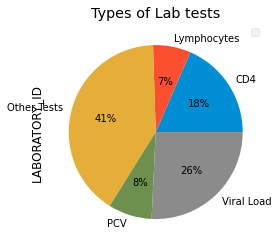

In [13]:
pie_plot(df_new, 'Labtest Name', 'LABORATORY_ID', 'Types of Lab tests')

## Split by Viral Load and CD4

In [131]:
df_viral = df.loc[df['Labtest Name'] == 'Viral Load']
df_cd4 = df.loc[df['Labtest Name'] == 'CD4']

### Check Categorical fields

In [17]:
df_viral['State'].value_counts()

Akwa Ibom      110367
Niger           34568
Cross River     34023
Adamawa         30501
Name: State, dtype: int64

In [135]:
df_viral['L.G.A'].value_counts()

Ikot Ekpene    28351
Ogoja          21390
Abak           17956
Essien Udim    17912
Ibiono-Ibom    13488
Mubi South     11805
Bida           10165
Etim Ekpo       8559
Obudu           8130
Itu             7482
Song            6992
Ikono           5446
Obot Akara      5149
Michika         4655
Ini             3833
Lapai           3523
Borgu           3323
Kontagora       3306
Rijau           3091
Mokwa           2633
Yala            2626
Rafi            2481
Numan           2374
Wushishi        2215
Ika             2191
Shiroro         1955
Obanliku        1877
Hong            1811
Gayuk           1765
Magama           768
Lavun            695
Maiha            470
Girei            390
Demsa            238
Mariga           208
Munya            174
Mashegu           31
Madagali           1
Name: L.G.A, dtype: int64

In [133]:
df_viral['COMMENT'].value_counts()

Routine Monitoring     154155
Targeted Monitoring     14904
                         3787
Target Monitoring          71
Name: COMMENT, dtype: int64

### Checking Viral Load

In [18]:
df_viral['resultab'] = df_viral['resultab'].astype(str)

In [19]:
df_viral_special_characters = df_viral[df_viral['resultab'].str.contains("<|>")]

In [20]:
df_viral_special_characters['resultab'].value_counts()

<40       19453
<20        6444
<400        147
<19          67
>20          63
          ...  
<520          1
<83           1
>14000        1
<822          1
<250          1
Name: resultab, Length: 263, dtype: int64

In [136]:
df_viral_vl_field = df_viral.groupby("resultab")["LABORATORY_ID"].count()
pd.set_option('display.max_rows',None)
df_viral_vl_field

resultab
\t154840          2
\t1762            3
\t17954           1
\t20             11
\t209             1
\t254             4
\t269493          2
\t295665          3
\t30235           1
\t344821\t        2
\t361             2
\t371914          2
\t402753          3
\t42999           3
\t436135          3
\t498             3
\t58500           3
\t90513           3
\t93722           5
\t96549           5
\t966172          4
\t968459          3
 <40              2
!50               1
,                 2
,,40              1
,40              31
,49               1
,<40              7
-                 3
-1033             1
-1308             1
-131551           1
-1722             1
-1761             1
-21               1
-23               1
-24               1
-242310           1
-26               1
-27               1
-2914             1
-30               1
-35               3
-36               1
-37               1
-38476            2
-41               1
-42462            1
-45        

In [21]:
print_num_rows_cols(df_viral,'Viral load')

Viral load data has 13 columns and 209459 rows.


In [22]:
check_null_values(df_viral)

There are 4 columns that have missing values


,Missing Values,% of Total Values
RESULTPC,198685,94.9
LABNO,42524,20.3
COMMENT,36542,17.4
DATE_REPORTED,772,0.4


In [24]:
print(f" Viral Load and CD4 lab tests account for: {len(df_viral) + len(df_cd4)} records which is: {round(100*(len(df_viral) + len(df_cd4))/len(df),2)} %")

 Viral Load and CD4 lab tests account for: 359814 records which is: 44.24 %


### Checking Duplicated

In [23]:
len(df_viral),df_viral['LABORATORY_ID'].nunique()

(209459, 209459)

In [25]:
df_viral.duplicated().sum()

0

In [26]:
print(f"There are {df_viral.loc[:, df_viral.columns != 'LABORATORY_ID'].duplicated(subset=['DATE_COLLECTED','PATIENT_ID','DATE_REPORTED','resultab','COMMENT','FACILITY_ID']).sum()} duplicate rows based on the DATE_REPORTED,DATE_COLLECTED,PATIENT_ID")

There are 6022 duplicate rows based on the DATE_REPORTED,DATE_COLLECTED,PATIENT_ID


In [27]:
df_new = df_viral[df_viral.loc[:, df_viral.columns != 'LABORATORY_ID'].duplicated(subset=['DATE_COLLECTED','PATIENT_ID','DATE_REPORTED','resultab','COMMENT','FACILITY_ID'])].sort_values(['PATIENT_ID','DATE_COLLECTED'])

### Check One row per lab visit

In [28]:
df_viral.groupby(['PATIENT_ID'])["LABORATORY_ID"].count().sort_values(ascending=False)

PATIENT_ID
146092    511
96019      99
146136     69
146241     65
114081     32
         ... 
94950       1
94991       1
94993       1
95004       1
162089      1
Name: LABORATORY_ID, Length: 80308, dtype: int64

In [29]:
# dataframe to check mulitple entries per patient
df_check = df_viral.groupby(['PATIENT_ID','State','DATE_REPORTED','DATE_COLLECTED','resultab','COMMENT','FACILITY_ID'])["LABORATORY_ID"].count().sort_values(ascending=False)
df_check = df_check.rename('duplicate_counts')
df_check = df_check.reset_index()

In [30]:
# dataframe to check mulitple entries per patient
df_check[df_check['duplicate_counts']>1]['State'].value_counts()

Akwa Ibom      1559
Niger           207
Adamawa         161
Cross River     120
Name: State, dtype: int64

### Push Entries with Duplicates

In [31]:
df_check_sub = df_check[df_check['duplicate_counts']>1]
df_check_sub = df_check_sub.loc[:,['PATIENT_ID','duplicate_counts']]
#df_check_sub.to_csv("multiple_lab_entries.csv, index=False")

In [32]:
print(f"Before deduplication the dataframe has {df_viral.shape[0]} rows")
print(" ")
df_viral.drop_duplicates(subset=['PATIENT_ID','DATE_REPORTED','DATE_COLLECTED','resultab'],inplace=True)
print(f"After deduplication the dataframe has {df_viral.shape[0]} rows")

Before deduplication the dataframe has 209459 rows
 
After deduplication the dataframe has 203208 rows


### Check Data Dates

In [33]:
df['DATE_REPORTED'] = pd.to_datetime(df['DATE_REPORTED'], format="%d/%m/%Y",errors='coerce')

In [34]:
df['DATE_COLLECTED'] = pd.to_datetime(df['DATE_COLLECTED'], format="%d/%m/%Y",errors='coerce')

In [35]:
print_min_max_dates(df,'DATE_REPORTED','reported')

 The earliest reported date is: 1913-08-05 00:00:00, and the most recent reported date is 2202-03-13 00:00:00


In [36]:
print_min_max_dates(df,'DATE_COLLECTED','reported')

 The earliest reported date is: 1913-08-05 00:00:00, and the most recent reported date is 2201-10-11 00:00:00


In [37]:
# Viral Load Dates
df_viral['DATE_COLLECTED'] = pd.to_datetime(df_viral['DATE_COLLECTED'], format="%d/%m/%Y",errors='coerce')
df_viral['DATE_REPORTED'] = pd.to_datetime(df_viral['DATE_REPORTED'], format="%d/%m/%Y",errors='coerce')
df_viral['REPORTED_YEAR'] = df_viral['DATE_REPORTED'].dt.year
df_viral['REPORTED_MONTH'] = df_viral['DATE_REPORTED'].dt.month
df_viral['COLLECTED_YEAR'] = df_viral['DATE_COLLECTED'].dt.year
df_viral['COLLECTED_MONTH'] = df_viral['DATE_COLLECTED'].dt.month

In [39]:
# CD4 counts Dates
df_cd4['DATE_COLLECTED'] = pd.to_datetime(df_cd4['DATE_COLLECTED'], format="%d/%m/%Y",errors='coerce')
df_cd4['DATE_REPORTED'] = pd.to_datetime(df_cd4['DATE_REPORTED'], format="%d/%m/%Y",errors='coerce')
df_cd4['REPORTED_YEAR'] = df_cd4['DATE_REPORTED'].dt.year
df_cd4['REPORTED_MONTH'] = df_cd4['DATE_REPORTED'].dt.month
df_cd4['COLLECTED_YEAR'] = df_cd4['DATE_COLLECTED'].dt.year
df_cd4['COLLECTED_MONTH'] = df_cd4['DATE_COLLECTED'].dt.month

## Filter for Dates between 2016 - 2021

In [40]:
df_viral_subset = df_viral.query("COLLECTED_YEAR > 2015 and COLLECTED_YEAR < 2022")

### Collection Year: Lab Visit

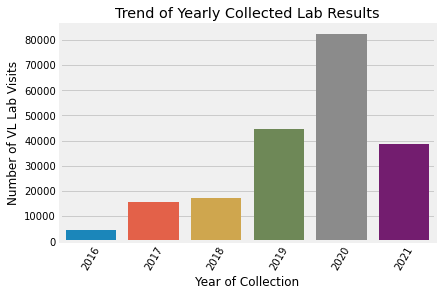

In [41]:
df_viral_slice = df_viral_subset.groupby('COLLECTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice.reset_index(inplace=True)
df_viral_slice['COLLECTED_YEAR'] = df_viral_slice['COLLECTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'COLLECTED_YEAR',y='LABORATORY_ID',data=df_viral_slice)
ax_viral.set(xlabel='Year of Collection', ylabel='Number of VL Lab Visits')
ax_viral.set_title('Trend of Yearly Collected Lab Results')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

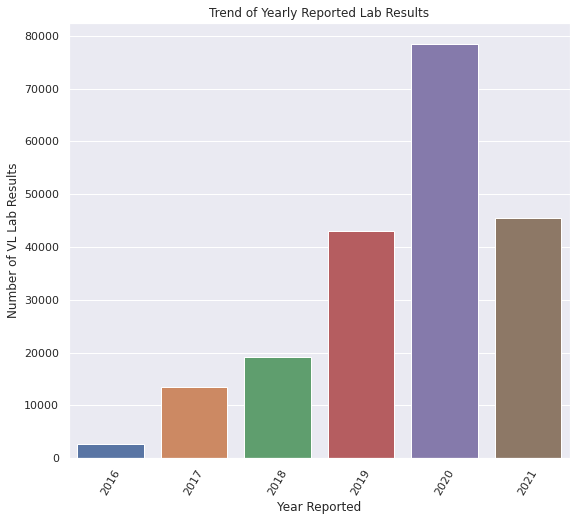

In [42]:
df_viral_subset1 = df_viral.query("REPORTED_YEAR > 2015 and REPORTED_YEAR < 2022")
df_viral_slice = df_viral_subset1.groupby('REPORTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice.reset_index(inplace=True)
df_viral_slice['REPORTED_YEAR'] = df_viral_slice['REPORTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'REPORTED_YEAR',y='LABORATORY_ID',data=df_viral_slice)
ax_viral.set(xlabel='Year Reported', ylabel='Number of VL Lab Results')
ax_viral.set_title('Trend of Yearly Reported Lab Results')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

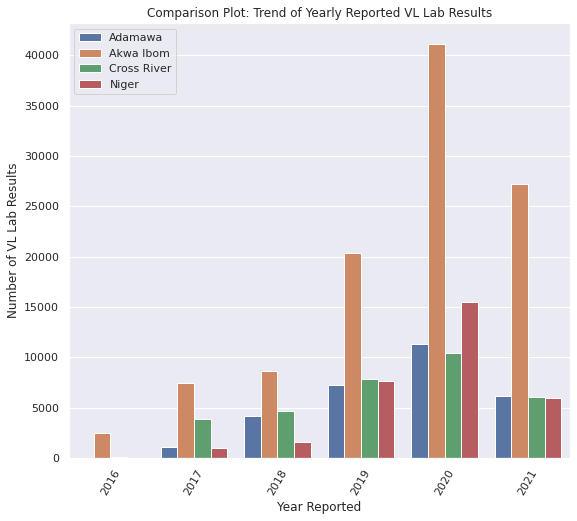

In [43]:
df_viral_slice = df_viral_subset1.groupby(['REPORTED_YEAR','State']).agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice.reset_index(inplace=True)
df_viral_slice['REPORTED_YEAR'] = df_viral_slice['REPORTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'REPORTED_YEAR',y='LABORATORY_ID',data=df_viral_slice,hue='State')
ax_viral.set(xlabel='Year Reported', ylabel='Number of VL Lab Results')
ax_viral.set_title('Comparison Plot: Trend of Yearly Reported VL Lab Results')
plt.xticks(rotation=60)
plt.legend(loc='upper left')
sns.set(rc={'figure.figsize':(10,10)})

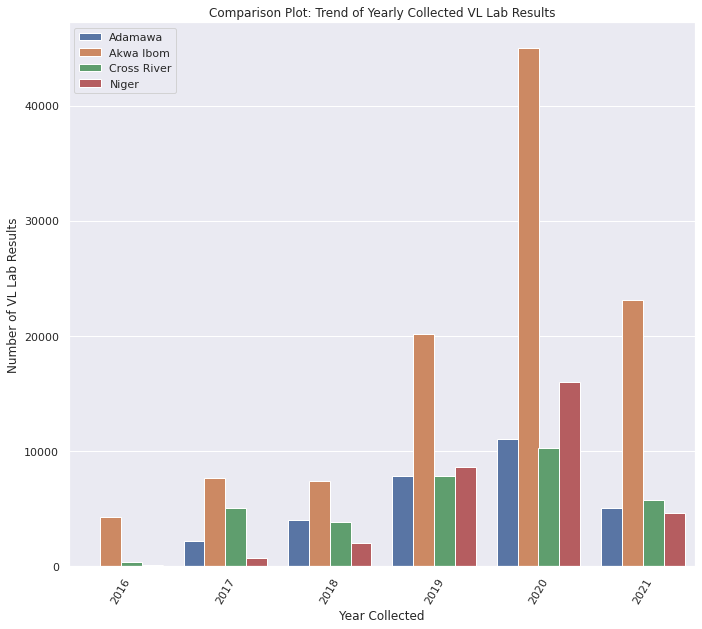

In [44]:
df_viral_slice = df_viral_subset.groupby(['COLLECTED_YEAR','State']).agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice.reset_index(inplace=True)
df_viral_slice['COLLECTED_YEAR'] = df_viral_slice['COLLECTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'COLLECTED_YEAR',y='LABORATORY_ID',data=df_viral_slice,hue='State')
ax_viral.set(xlabel='Year Collected', ylabel='Number of VL Lab Results')
ax_viral.set_title('Comparison Plot: Trend of Yearly Collected VL Lab Results')
plt.xticks(rotation=60)
plt.legend(loc='upper left')
sns.set(rc={'figure.figsize':(10,10)})

In [45]:
display(df_viral_subset1.groupby(['REPORTED_YEAR','REPORTED_MONTH'])['LABORATORY_ID'].count().sort_index().to_frame().style)

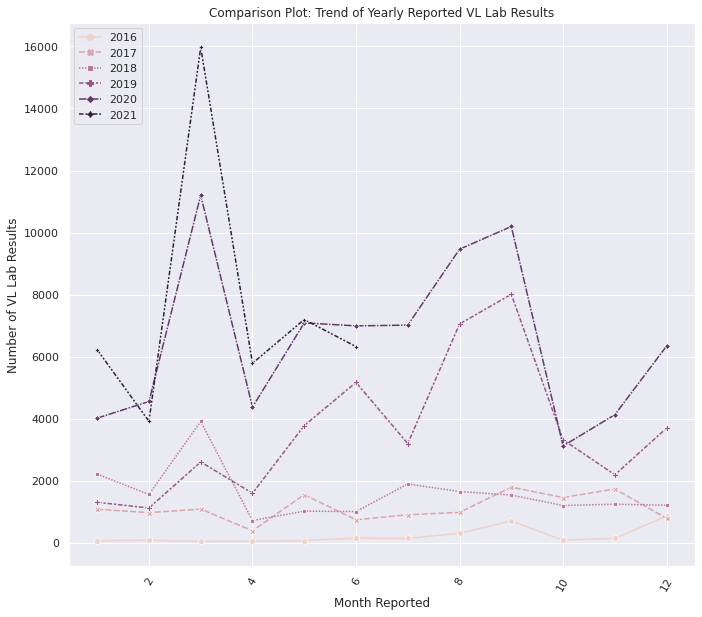

In [46]:
df_viral_slice = df_viral_subset1.groupby(['REPORTED_YEAR','REPORTED_MONTH']).agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice.reset_index(inplace=True)
df_viral_slice['REPORTED_YEAR'] = df_viral_slice['REPORTED_YEAR'].astype('int')
df_viral_slice['REPORTED_MONTH'] = df_viral_slice['REPORTED_MONTH'].astype('int')
ax_viral = sns.lineplot(x = 'REPORTED_MONTH',y='LABORATORY_ID',data=df_viral_slice,hue='REPORTED_YEAR',markers=True,style="REPORTED_YEAR",)
ax_viral.set(xlabel='Month Reported', ylabel='Number of VL Lab Results')
ax_viral.set_title('Comparison Plot: Trend of Yearly Reported VL Lab Results')
plt.xticks(rotation=60)
plt.legend(loc='upper left')
sns.set(rc={'figure.figsize':(10,10)})

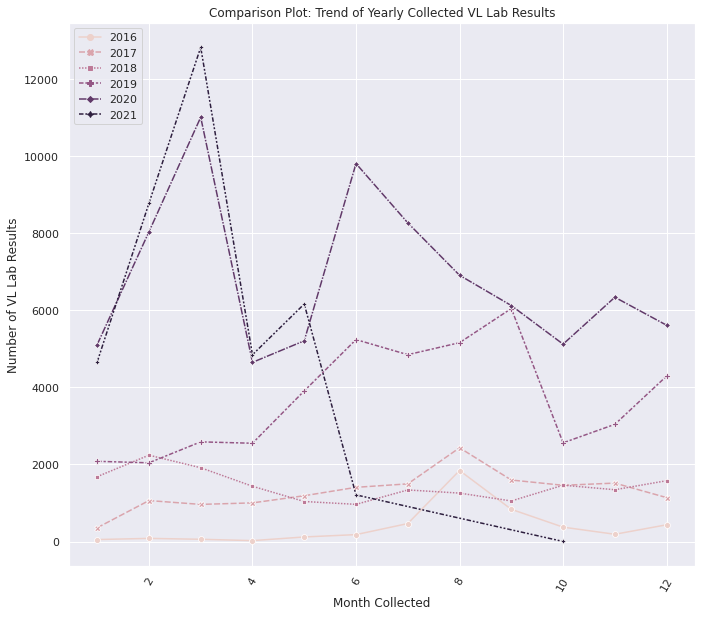

In [47]:
df_viral_slice = df_viral_subset.groupby(['COLLECTED_YEAR','COLLECTED_MONTH']).agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice.reset_index(inplace=True)
df_viral_slice['COLLECTED_YEAR'] = df_viral_slice['COLLECTED_YEAR'].astype('int')
df_viral_slice['COLLECTED_MONTH'] = df_viral_slice['COLLECTED_MONTH'].astype('int')
ax_viral = sns.lineplot(x = 'COLLECTED_MONTH',y='LABORATORY_ID',data=df_viral_slice,hue='COLLECTED_YEAR',markers=True,style="COLLECTED_YEAR",)
ax_viral.set(xlabel='Month Collected', ylabel='Number of VL Lab Results')
ax_viral.set_title('Comparison Plot: Trend of Yearly Collected VL Lab Results')
plt.xticks(rotation=60)
plt.legend(loc='upper left')
sns.set(rc={'figure.figsize':(10,10)})

In [48]:
df_viral_report = df_viral_subset1.groupby(['REPORTED_YEAR','REPORTED_MONTH'])['LABORATORY_ID'].count().sort_index()

In [50]:
display(df_viral_subset.groupby(['COLLECTED_YEAR','COLLECTED_MONTH'])['LABORATORY_ID'].count().sort_index().to_frame().style)

## Split Data by States and CD4 or Viral Load

In [51]:
df_cross = df.loc[df['State'] == 'Cross River']
df_niger = df.loc[df['State'] == 'Niger']
df_adamawa = df.loc[df['State'] == 'Adamawa']
df_akwa_ibom = df.loc[df['State'] == 'Akwa Ibom']

In [52]:
df_viral_cross = df_viral.loc[df_viral['State'] == 'Cross River']
df_viral_niger = df_viral.loc[df_viral['State'] == 'Niger']
df_viral_adamawa = df_viral.loc[df_viral['State'] == 'Adamawa']
df_viral_akwa_ibom = df_viral.loc[df_viral['State'] == 'Akwa Ibom']

In [53]:
df_cd4_cross = df_cd4.loc[df_cd4['State'] == 'Cross River']
df_cd4_niger = df_cd4.loc[df_cd4['State'] == 'Niger']
df_cd4_adamawa = df_cd4.loc[df_cd4['State'] == 'Adamawa']
df_cd4_akwa_ibom = df_cd4.loc[df_cd4['State'] == 'Akwa Ibom']

### Viral Load

#### Cross River

In [54]:
print_num_rows_cols(df_viral_cross,'Cross River')

Cross River data has 17 columns and 33195 rows.


In [55]:
df_viral_cross['Labtest Name'].nunique()

1

In [57]:
len(df_viral_cross),df_viral_cross['PATIENT_ID'].nunique()

(33195, 11763)

##### Lab Visits Summary

In [58]:
df_viral_cross_sub = df_viral_cross.loc[(df_viral_cross['REPORTED_YEAR'] > 2015.0) & (df_viral_cross['REPORTED_YEAR'] < 2022.0) & (df_viral_cross['COLLECTED_YEAR'] > 2015.0) & (df_viral_cross['COLLECTED_YEAR'] < 2022.0)] 

In [59]:
df_viral_cross_sub.REPORTED_YEAR.max()

2021.0

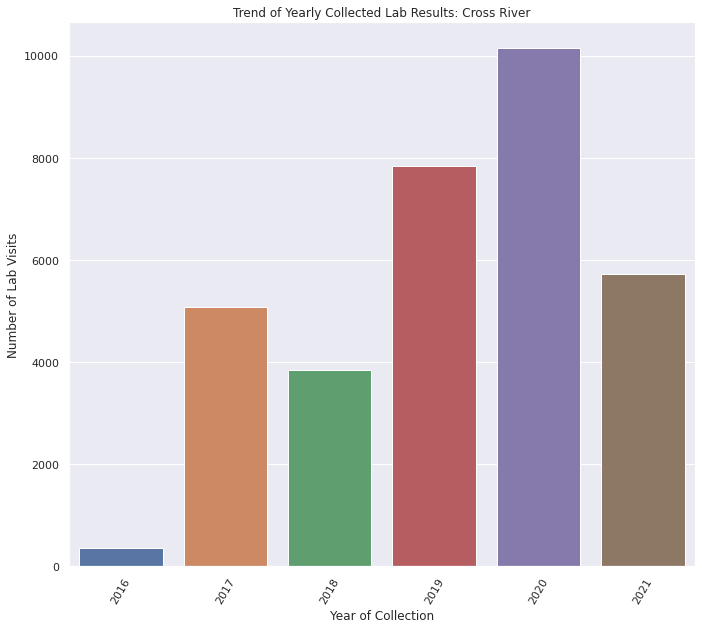

In [60]:
df_viral_cross_slice = df_viral_cross_sub.groupby('COLLECTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_cross_slice.reset_index(inplace=True)
df_viral_cross_slice['COLLECTED_YEAR'] = df_viral_cross_slice['COLLECTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'COLLECTED_YEAR',y='LABORATORY_ID',data=df_viral_cross_slice)
ax_viral.set(xlabel='Year of Collection', ylabel='Number of Lab Visits')
ax_viral.set_title('Trend of Yearly Collected Lab Results: Cross River')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

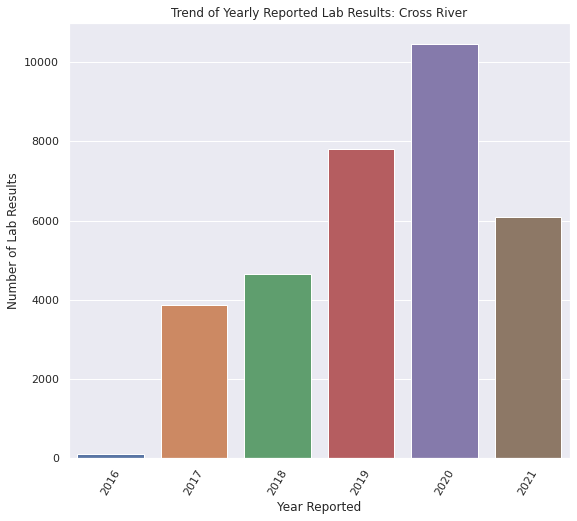

In [61]:
df_viral_slice_rep = df_viral_cross_sub.groupby('REPORTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice_rep.reset_index(inplace=True)
df_viral_slice_rep['REPORTED_YEAR'] = df_viral_slice_rep['REPORTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'REPORTED_YEAR',y='LABORATORY_ID',data=df_viral_slice_rep)
ax_viral.set(xlabel='Year Reported', ylabel='Number of Lab Results')
ax_viral.set_title('Trend of Yearly Reported Lab Results: Cross River')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

#### Adamawa

In [62]:
print_num_rows_cols(df_viral_adamawa,'Laboratory: Adamawa')

Laboratory: Adamawa data has 17 columns and 30141 rows.


In [63]:
df_viral_adamawa.columns

Index(['State', 'L.G.A', 'Facility Name', 'Labtest Name', 'LABORATORY_ID',
       'PATIENT_ID', 'FACILITY_ID', 'DATE_REPORTED', 'DATE_COLLECTED', 'LABNO',
       'resultab', 'RESULTPC', 'COMMENT', 'REPORTED_YEAR', 'REPORTED_MONTH',
       'COLLECTED_YEAR', 'COLLECTED_MONTH'],
      dtype='object')

In [64]:
check_null_values(df_viral_adamawa)

There are 9 columns that have missing values


,Missing Values,% of Total Values
RESULTPC,24877,82.5
LABNO,6128,20.3
COMMENT,1566,5.2
DATE_REPORTED,112,0.4
REPORTED_YEAR,112,0.4
REPORTED_MONTH,112,0.4
DATE_COLLECTED,21,0.1
COLLECTED_YEAR,21,0.1
COLLECTED_MONTH,21,0.1


In [65]:
len(df_viral_adamawa),df_viral_adamawa['PATIENT_ID'].nunique()

(30141, 11320)

##### Visits Summary

In [66]:
df_viral_adamawa_sub = df_viral_adamawa.loc[(df_viral_adamawa['REPORTED_YEAR'] > 2015.0) & (df_viral_adamawa['REPORTED_YEAR'] < 2022.0) & (df_viral_adamawa['COLLECTED_YEAR'] > 2015.0) & (df_viral_adamawa['COLLECTED_YEAR'] < 2022.0)]

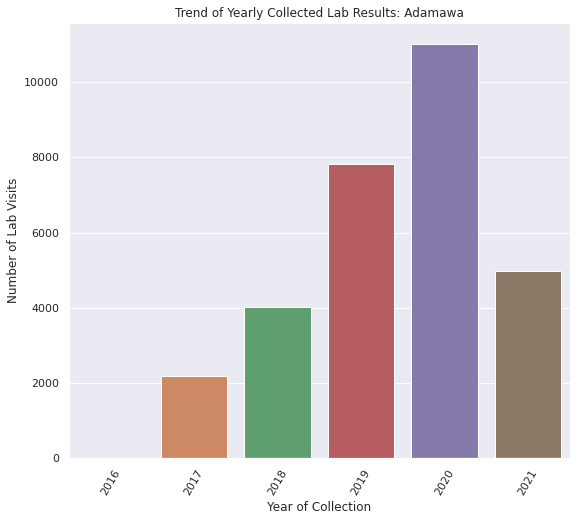

In [67]:
df_viral_adamawa_slice = df_viral_adamawa_sub.groupby('COLLECTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_adamawa_slice.reset_index(inplace=True)
df_viral_adamawa_slice['COLLECTED_YEAR'] = df_viral_adamawa_slice['COLLECTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'COLLECTED_YEAR',y='LABORATORY_ID',data=df_viral_adamawa_slice)
ax_viral.set(xlabel='Year of Collection', ylabel='Number of Lab Visits')
ax_viral.set_title('Trend of Yearly Collected Lab Results: Adamawa')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

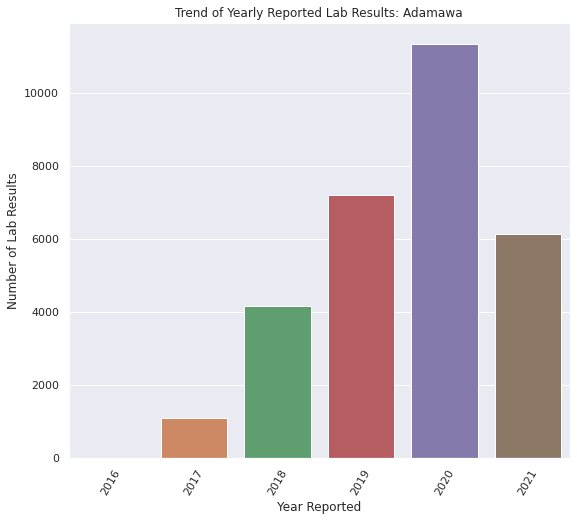

In [68]:
df_viral_slice_rep = df_viral_adamawa_sub.groupby('REPORTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice_rep.reset_index(inplace=True)
df_viral_slice_rep['REPORTED_YEAR'] = df_viral_slice_rep['REPORTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'REPORTED_YEAR',y='LABORATORY_ID',data=df_viral_slice_rep)
ax_viral.set(xlabel='Year Reported', ylabel='Number of Lab Results')
ax_viral.set_title('Trend of Yearly Reported Lab Results: Adamawa')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

In [69]:
df_viral_adamawa.groupby('REPORTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})

,LABORATORY_ID
REPORTED_YEAR,
2008.0,1
2010.0,2
2011.0,1
2012.0,1
2015.0,1
2016.0,5
2017.0,1097
2018.0,4189
2019.0,7226


#### Akwa Ibom

In [70]:
print_num_rows_cols(df_viral_akwa_ibom,'Laboratory Akwa Ibom')

Laboratory Akwa Ibom data has 17 columns and 107751 rows.


In [71]:
len(df_viral_akwa_ibom),df_viral_akwa_ibom['PATIENT_ID'].nunique()

(107751, 45110)

##### Visits Summary

In [72]:
df_viral_akwa_ibom_sub = df_viral_akwa_ibom.loc[(df_viral_akwa_ibom['REPORTED_YEAR'] > 2015.0) & (df_viral_akwa_ibom['REPORTED_YEAR'] < 2022.0) & (df_viral_akwa_ibom['COLLECTED_YEAR'] > 2015.0) & (df_viral_akwa_ibom['COLLECTED_YEAR'] < 2022.0)]

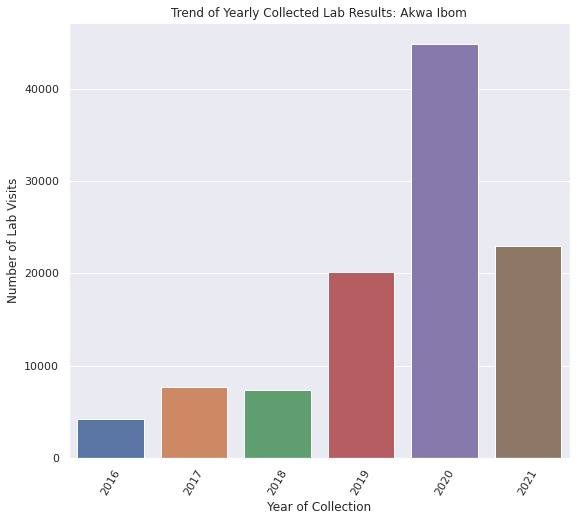

In [73]:
df_viral_akwa_ibom_slice = df_viral_akwa_ibom_sub.groupby('COLLECTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_akwa_ibom_slice.reset_index(inplace=True)
df_viral_akwa_ibom_slice['COLLECTED_YEAR'] = df_viral_akwa_ibom_slice['COLLECTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'COLLECTED_YEAR',y='LABORATORY_ID',data=df_viral_akwa_ibom_slice)
ax_viral.set(xlabel='Year of Collection', ylabel='Number of Lab Visits')
ax_viral.set_title('Trend of Yearly Collected Lab Results: Akwa Ibom')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

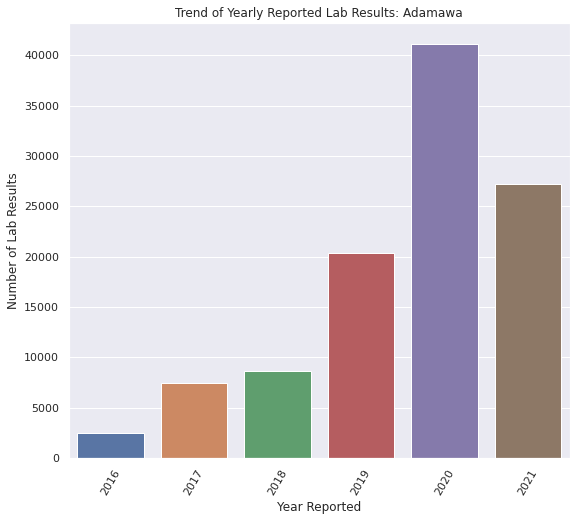

In [74]:
df_viral_slice_rep = df_viral_akwa_ibom_sub.groupby('REPORTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice_rep.reset_index(inplace=True)
df_viral_slice_rep['REPORTED_YEAR'] = df_viral_slice_rep['REPORTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'REPORTED_YEAR',y='LABORATORY_ID',data=df_viral_slice_rep)
ax_viral.set(xlabel='Year Reported', ylabel='Number of Lab Results')
ax_viral.set_title('Trend of Yearly Reported Lab Results: Adamawa')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

#### Niger

In [75]:
print_num_rows_cols(df_viral_niger,'Lab Niger')

Lab Niger data has 17 columns and 32121 rows.


In [76]:
len(df_viral_niger),df_viral_niger['PATIENT_ID'].nunique()

(32121, 12115)

In [77]:
check_null_values(df_viral_niger)

There are 9 columns that have missing values


,Missing Values,% of Total Values
RESULTPC,31710,98.7
LABNO,10820,33.7
COMMENT,8645,26.9
DATE_REPORTED,214,0.7
REPORTED_YEAR,214,0.7
REPORTED_MONTH,214,0.7
DATE_COLLECTED,8,0.0
COLLECTED_YEAR,8,0.0
COLLECTED_MONTH,8,0.0


##### Visits Summary

In [78]:
df_viral_niger_sub = df_viral_niger.loc[(df_viral_niger['REPORTED_YEAR'] > 2015.0) & (df_viral_niger['REPORTED_YEAR'] < 2022.0) & (df_viral_niger['COLLECTED_YEAR'] > 2015.0) & (df_viral_niger['COLLECTED_YEAR'] < 2022.0)]

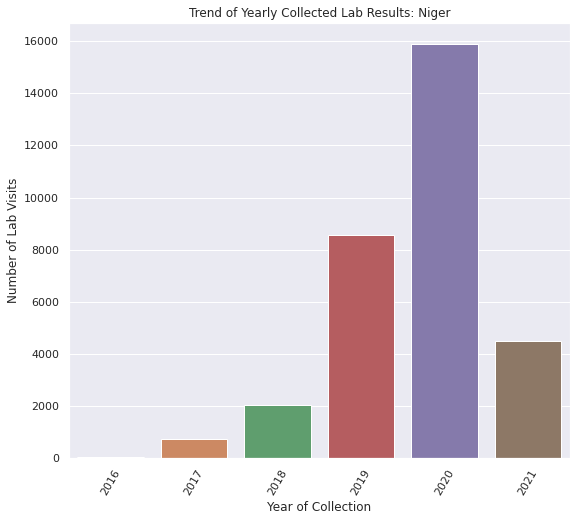

In [79]:
df_viral_niger_slice = df_viral_niger_sub.groupby('COLLECTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_niger_slice.reset_index(inplace=True)
df_viral_niger_slice['COLLECTED_YEAR'] = df_viral_niger_slice['COLLECTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'COLLECTED_YEAR',y='LABORATORY_ID',data=df_viral_niger_slice)
ax_viral.set(xlabel='Year of Collection', ylabel='Number of Lab Visits')
ax_viral.set_title('Trend of Yearly Collected Lab Results: Niger')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

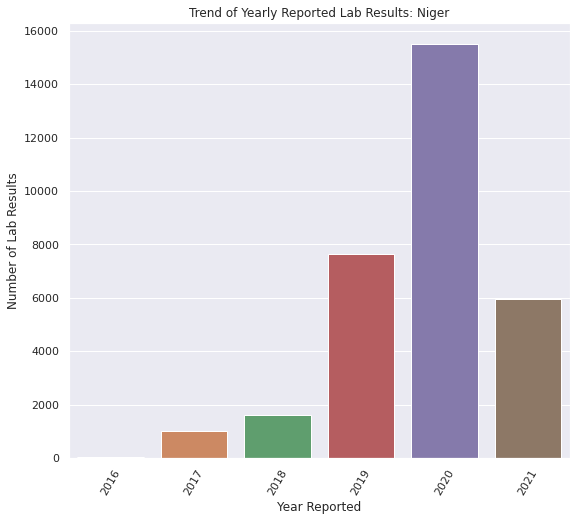

In [80]:
df_viral_slice_rep = df_viral_niger_sub.groupby('REPORTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})
df_viral_slice_rep.reset_index(inplace=True)
df_viral_slice_rep['REPORTED_YEAR'] = df_viral_slice_rep['REPORTED_YEAR'].astype('int')
ax_viral = sns.barplot(x = 'REPORTED_YEAR',y='LABORATORY_ID',data=df_viral_slice_rep)
ax_viral.set(xlabel='Year Reported', ylabel='Number of Lab Results')
ax_viral.set_title('Trend of Yearly Reported Lab Results: Niger')
plt.xticks(rotation=60)
sns.set(rc={'figure.figsize':(8,8)})

In [81]:
df_viral_niger_sub.groupby('REPORTED_YEAR').agg({'LABORATORY_ID':lambda x: x.nunique()})

,LABORATORY_ID
REPORTED_YEAR,
2016.0,33
2017.0,1030
2018.0,1604
2019.0,7637
2020.0,15515
2021.0,5972


#### Total Visits Calculation

In [82]:
df_viral['LAB_REPORTED_COLLECTED_DAYS'] = df_viral['DATE_REPORTED'] - df_viral['DATE_COLLECTED']
df_viral['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'] = df_viral['LAB_REPORTED_COLLECTED_DAYS']/np.timedelta64(1, 'D')

In [83]:
print(f" There are {df_viral.LAB_REPORTED_COLLECTED_DAYS_ACTUAL.isnull().sum()} with no report dates")

 There are 786 with no report dates


In [84]:
df_viral['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'] = df_viral['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'].fillna(0.0)

In [85]:
df_viral['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'] = df_viral['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'].astype('int')

Text(0.5, 1.0, 'Distribution of Days between Viral Collection and Report')

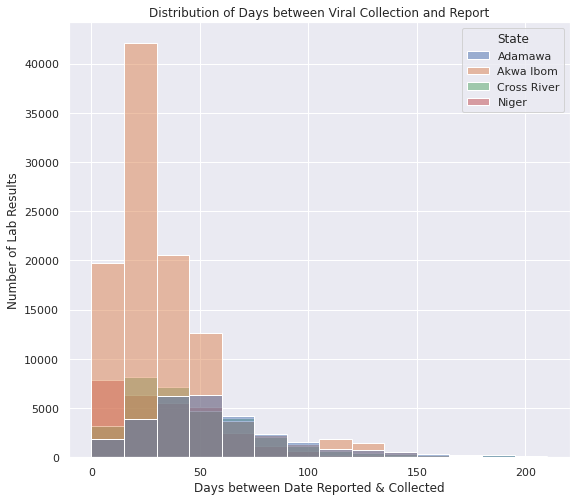

In [86]:
df_viral_check = df_viral.loc[(df_viral['REPORTED_YEAR'] > 2015.0) & (df_viral['REPORTED_YEAR'] < 2022.0) & (df_viral['COLLECTED_YEAR'] > 2015.0) & (df_viral['COLLECTED_YEAR'] < 2022.0)]
df_viral_plot =  df_viral_check.query("LAB_REPORTED_COLLECTED_DAYS_ACTUAL >= 0 and LAB_REPORTED_COLLECTED_DAYS_ACTUAL <= 200")
ax_viral = sns.histplot(data=df_viral_plot, x="LAB_REPORTED_COLLECTED_DAYS_ACTUAL",hue="State",binwidth=15)
ax_viral.set(xlabel='Days between Date Reported & Collected', ylabel='Number of Lab Results')
ax_viral.set_title("Distribution of Days between Viral Collection and Report")

Text(0.5, 1.0, 'Distribution of Days between Viral Collection and Report')

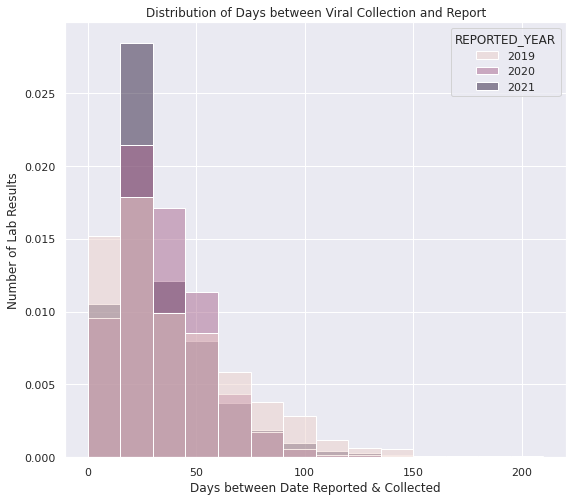

In [88]:
df_viral_plot =  df_viral_check.query("LAB_REPORTED_COLLECTED_DAYS_ACTUAL >= 0 and LAB_REPORTED_COLLECTED_DAYS_ACTUAL <= 200")
df_viral_plot['REPORTED_YEAR'] = df_viral_plot['REPORTED_YEAR'].astype('int')
df_viral_plot = df_viral_plot.query("REPORTED_YEAR > 2018")
ax_viral = sns.histplot(data=df_viral_plot, x="LAB_REPORTED_COLLECTED_DAYS_ACTUAL",hue="REPORTED_YEAR",binwidth=15,stat='density',common_norm=False)
ax_viral.set(xlabel='Days between Date Reported & Collected', ylabel='Number of Lab Results')
ax_viral.set_title("Distribution of Days between Viral Collection and Report")

In [90]:
round(df_viral_plot.groupby('State')['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'].mean(),2)

State
Adamawa        49.69
Akwa Ibom      28.93
Cross River    42.91
Niger          36.87
Name: LAB_REPORTED_COLLECTED_DAYS_ACTUAL, dtype: float64

In [91]:
round(df_viral_plot.groupby('State')['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'].median(),2)

State
Adamawa        47
Akwa Ibom      24
Cross River    37
Niger          34
Name: LAB_REPORTED_COLLECTED_DAYS_ACTUAL, dtype: int64

In [92]:
df_count = round(df_viral_plot.groupby('State')['LAB_REPORTED_COLLECTED_DAYS_ACTUAL'].mean(),2)

#### Generate the plots for Averages

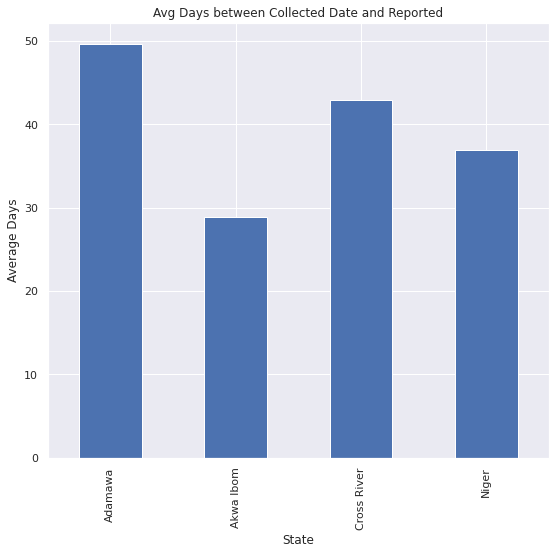

In [93]:
p1 = df_count.plot(kind='bar', title='Avg Days between Collected Date and Reported',ylabel='Average Days')

### CD4 

#### Cross River

In [94]:
print_num_rows_cols(df_cd4_cross,'Cross River')

Cross River data has 17 columns and 16816 rows.


In [95]:
check_null_values(df_cd4_cross)

There are 10 columns that have missing values


,Missing Values,% of Total Values
RESULTPC,16244,96.6
COMMENT,15855,94.3
LABNO,400,2.4
DATE_REPORTED,26,0.2
REPORTED_YEAR,26,0.2
REPORTED_MONTH,26,0.2
resultab,25,0.1
DATE_COLLECTED,4,0.0
COLLECTED_YEAR,4,0.0
COLLECTED_MONTH,4,0.0


In [96]:
df_cd4_cross_sub = slice_df_by_date(df_cd4_cross, 'REPORTED_YEAR', 'COLLECTED_YEAR', 2014, 2022)

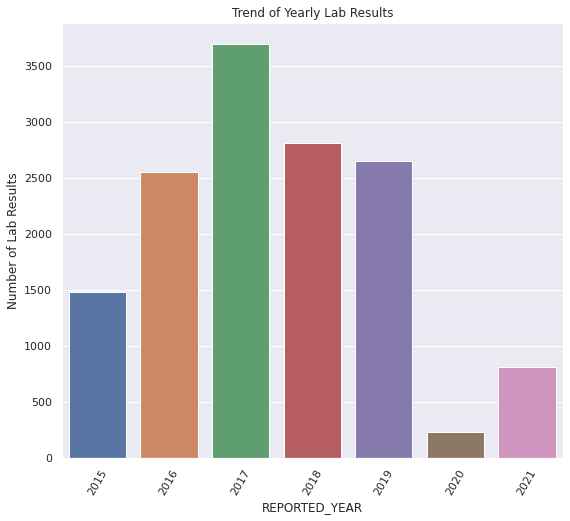

In [97]:
yearly_bar_plot(df_cd4_cross_sub, 'REPORTED_YEAR','LABORATORY_ID')

#### Adamawa

In [99]:
df_cd4_adamawa_sub = slice_df_by_date(df_cd4_adamawa, 'REPORTED_YEAR', 'COLLECTED_YEAR', 2014, 2022)

In [100]:
print_num_rows_cols(df_cd4_adamawa,'Adamawa')

Adamawa data has 17 columns and 16461 rows.


In [101]:
check_null_values(df_cd4_adamawa)

There are 10 columns that have missing values


,Missing Values,% of Total Values
COMMENT,16411,99.7
RESULTPC,14307,86.9
LABNO,2216,13.5
resultab,134,0.8
DATE_REPORTED,38,0.2
REPORTED_YEAR,38,0.2
REPORTED_MONTH,38,0.2
DATE_COLLECTED,29,0.2
COLLECTED_YEAR,29,0.2
COLLECTED_MONTH,29,0.2


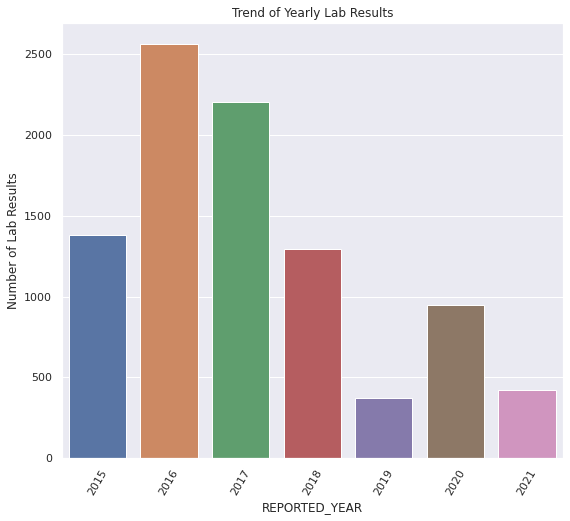

In [102]:
yearly_bar_plot(df_cd4_adamawa_sub, 'REPORTED_YEAR','LABORATORY_ID')

#### Akwa Ibom

In [104]:
df_cd4_akwa_ibom_sub = slice_df_by_date(df_cd4_akwa_ibom, 'REPORTED_YEAR', 'COLLECTED_YEAR', 2014, 2022)

In [105]:
print_num_rows_cols(df_cd4_akwa_ibom,'Akwa Ibom')

Akwa Ibom data has 17 columns and 53064 rows.


In [106]:
check_null_values(df_cd4_akwa_ibom)

There are 10 columns that have missing values


,Missing Values,% of Total Values
COMMENT,52832,99.6
RESULTPC,51006,96.1
LABNO,19682,37.1
resultab,332,0.6
DATE_COLLECTED,39,0.1
COLLECTED_YEAR,39,0.1
COLLECTED_MONTH,39,0.1
DATE_REPORTED,15,0.0
REPORTED_YEAR,15,0.0
REPORTED_MONTH,15,0.0


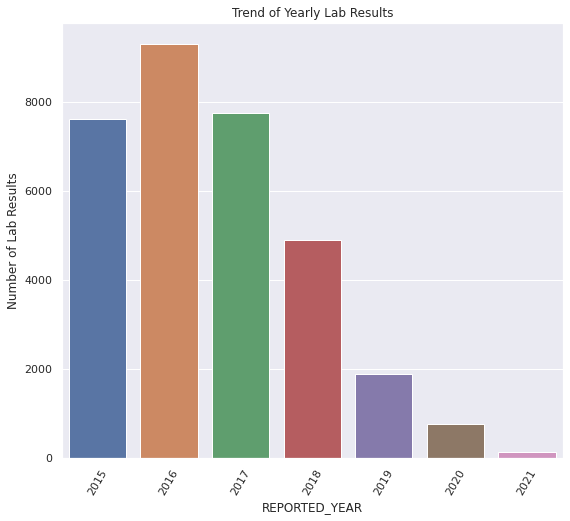

In [108]:
yearly_bar_plot(df_cd4_akwa_ibom_sub, 'REPORTED_YEAR','LABORATORY_ID')

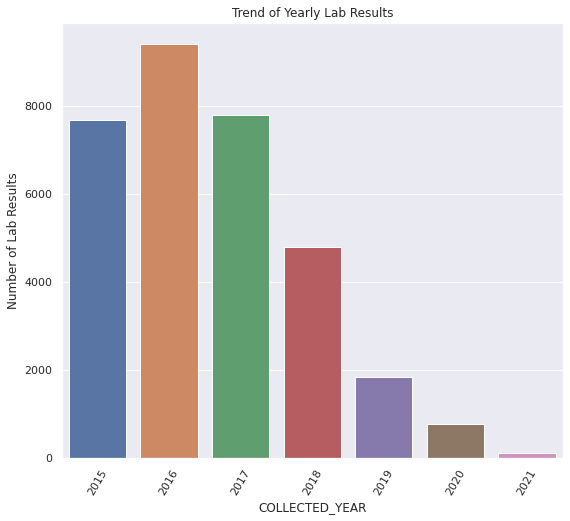

In [109]:
yearly_bar_plot(df_cd4_akwa_ibom_sub, 'COLLECTED_YEAR','LABORATORY_ID')

#### Niger

In [110]:
df_cd4_niger_sub = slice_df_by_date(df_cd4_niger, 'REPORTED_YEAR', 'COLLECTED_YEAR', 2014, 2022)

In [111]:
print_num_rows_cols(df_cd4_niger,'Niger')

Niger data has 17 columns and 64014 rows.


In [112]:
check_null_values(df_cd4_niger)

There are 10 columns that have missing values


,Missing Values,% of Total Values
COMMENT,63891,99.8
RESULTPC,61080,95.4
LABNO,37225,58.2
resultab,2638,4.1
DATE_COLLECTED,2389,3.7
COLLECTED_YEAR,2389,3.7
COLLECTED_MONTH,2389,3.7
DATE_REPORTED,145,0.2
REPORTED_YEAR,145,0.2
REPORTED_MONTH,145,0.2


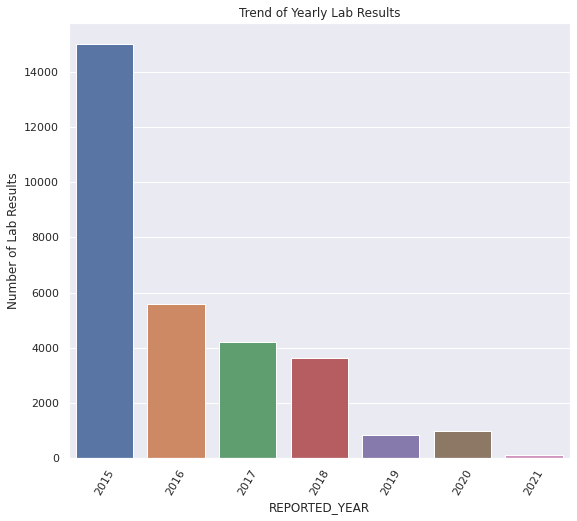

In [114]:
yearly_bar_plot(df_cd4_niger_sub, 'REPORTED_YEAR','LABORATORY_ID')

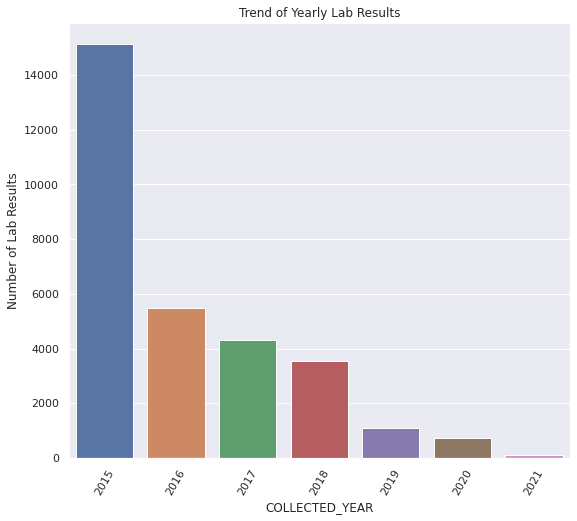

In [115]:
yearly_bar_plot(df_cd4_niger_sub, 'COLLECTED_YEAR','LABORATORY_ID')

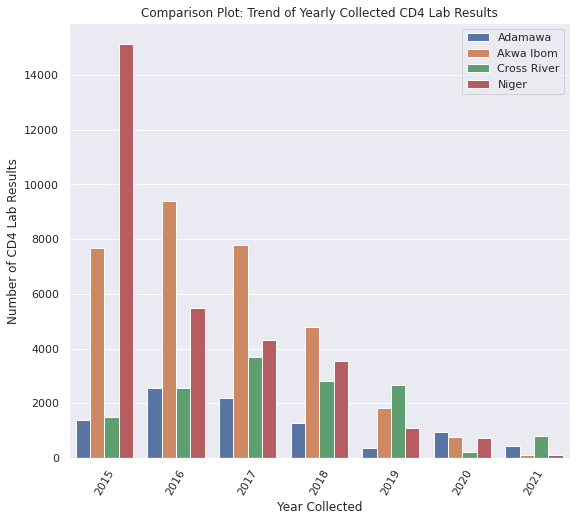

In [116]:
df_cd4_sub = slice_df_by_date(df_cd4, 'REPORTED_YEAR', 'COLLECTED_YEAR', 2014, 2022)
df_cd4_slice = df_cd4_sub.groupby(['COLLECTED_YEAR','State']).agg({'LABORATORY_ID':lambda x: x.nunique()})
df_cd4_slice.reset_index(inplace=True)
df_cd4_slice['COLLECTED_YEAR'] = df_cd4_slice['COLLECTED_YEAR'].astype('int')
ax_cd4 = sns.barplot(x = 'COLLECTED_YEAR',y='LABORATORY_ID',data=df_cd4_slice,hue='State')
ax_cd4.set(xlabel='Year Collected', ylabel='Number of CD4 Lab Results')
ax_cd4.set_title('Comparison Plot: Trend of Yearly Collected CD4 Lab Results')
plt.xticks(rotation=60)
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(10,10)})

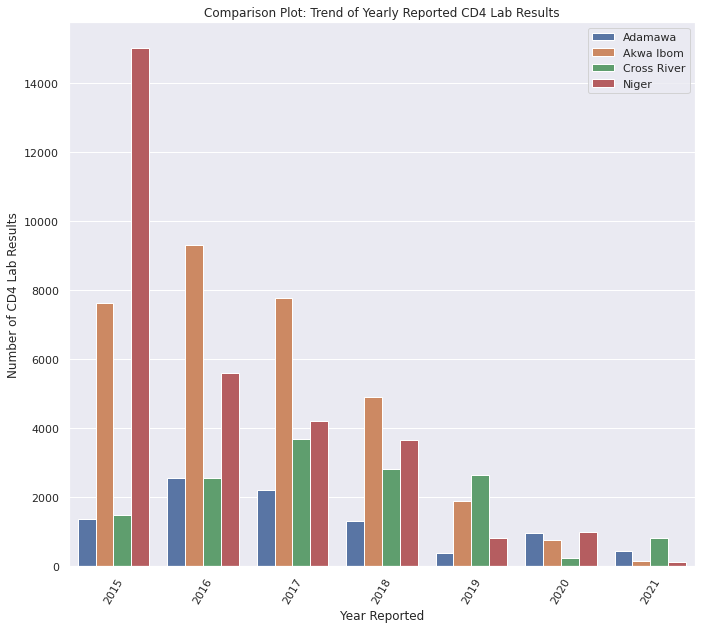

In [117]:
df_cd4_sub = slice_df_by_date(df_cd4, 'REPORTED_YEAR', 'COLLECTED_YEAR', 2014, 2022)
df_cd4_slice = df_cd4_sub.groupby(['REPORTED_YEAR','State']).agg({'LABORATORY_ID':lambda x: x.nunique()})
df_cd4_slice.reset_index(inplace=True)
df_cd4_slice['REPORTED_YEAR'] = df_cd4_slice['REPORTED_YEAR'].astype('int')
ax_cd4 = sns.barplot(x = 'REPORTED_YEAR',y='LABORATORY_ID',data=df_cd4_slice,hue='State')
ax_cd4.set(xlabel='Year Reported', ylabel='Number of CD4 Lab Results')
ax_cd4.set_title('Comparison Plot: Trend of Yearly Reported CD4 Lab Results')
plt.xticks(rotation=60)
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(10,10)})

## Check Diff between Collected Date and Report Date

In [118]:
def calculate_days_diff(df, rep_date: str,col_date: str):
    if df is not None:
        try:
            df['DAYS_BETWEEN_COLLECTION_REPORT'] = df[rep_date] - df[col_date]
            df['DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL'] = df['DAYS_BETWEEN_COLLECTION_REPORT']/np.timedelta64(1, 'D')
            df['DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL'] = df['DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL'].fillna(0.0)
            df['DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL'] = df['DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL'].astype(int)
            return df
        except Exception as e:
            print(f"Exception on calculating days difference with error: {e}")
            

In [119]:
df_viral = calculate_days_diff(df_viral,'DATE_REPORTED','DATE_COLLECTED')

Text(0.5, 1.0, 'Distribution of Days between Collected and Reported Date')

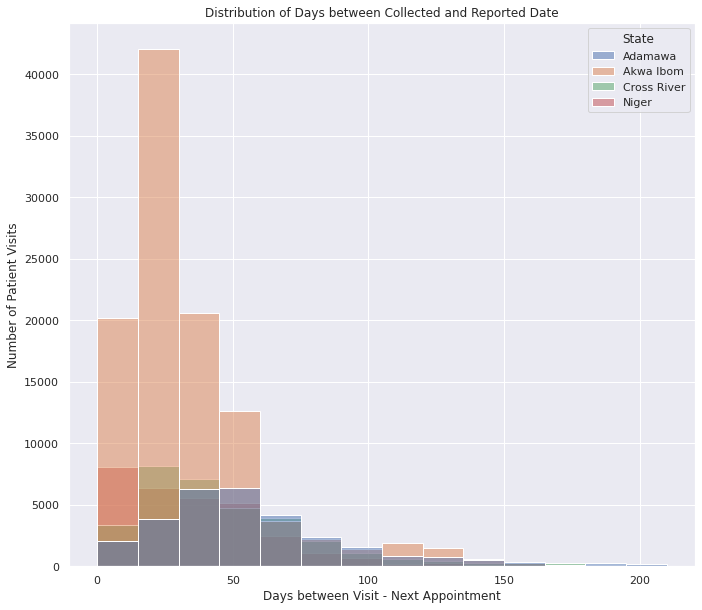

In [120]:
df_viral_slice =  df_viral.query("DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL >= 0 and DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL <= 200")
ax_new = sns.histplot(data=df_viral_slice, x="DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL", binwidth=15,hue='State')
ax_new.set(xlabel='Days between Visit - Next Appointment', ylabel='Number of Patient Visits')
ax_new.set_title("Distribution of Days between Collected and Reported Date")

In [121]:
df_viral_slice.DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL.median(),round(df_viral_slice.DAYS_BETWEEN_COLLECTION_REPORT_ACTUAL.mean(),2)

(32.0, 39.77)